# The best neighborhood in Pittsburgh?

## Group 1
* Peyman Abbasian
* Diana M Randall
* Alexander L Freiwald 

![alt text](https://media.giphy.com/media/dxgEz5tWSRMk1tsyrt/giphy.gif)

## Introduction

By using dataset that provided by the WPRDC, I will show which neighborhood in Pittsburgh is the best in field of restaurants.

## The Metric
I use following items as metric to prove my claim:
* number of restaruants in each neighborhood
* Number of seat of restaurants
* area of restaurants
---

## Data

 The database used is proviede by the http://www.wprdc.org/news/so-you-want-to-use-open-data/ website.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [39]:
restaurant = pd.read_csv("restaurant01.csv")
restaurant.head(10)

,id,facility_name,num,street,city,state,zip,municipal,category_cd,description,...,bus_st_date,bus_cl_date,seat_count,noroom,sq_feet,status,placard_st,x,y,address
0,10762.0,North Versailles VFD / South Wilmerding Social...,830,Sylvan Ave,North Versailles,PA,15137.0,North Versailles,250,Social Club-Bar Only,...,1/1/1969,NaN,60.0,NaN,NaN,1,1.0,-79.795405,40.389344,"830 Sylvan Ave North Versailles, PA 15137"
1,10781.0,Hill Top Lodge #151,128-30,Ormsby Ave,Pittsburgh,PA,15210.0,Mt Oliver,250,Social Club-Bar Only,...,6/17/1984,NaN,35.0,NaN,NaN,7,NaN,NaN,NaN,"128-30 Ormsby Ave Pittsburgh, PA 15210"
2,10693.0,The Suburban Room,3113,W Liberty Ave,Pittsburgh,PA,15216.0,Dormont,201,Restaurant with Liquor,...,6/17/1984,NaN,41.0,NaN,NaN,7,1.0,NaN,NaN,"3113 W Liberty Ave Pittsburgh, PA 15216"
3,10707.0,Hyd A Way Bar,NaN,Box 39,Morgan,PA,15064.0,South Fayette,201,Restaurant with Liquor,...,3/1/1987,NaN,30.0,NaN,NaN,7,NaN,NaN,NaN,"Box 39 Morgan, PA 15064"
4,10711.0,Bratstvo Lodge #6 SNPJ,540,3rd Avenue,Bridgeville,PA,15017.0,Bridgeville,201,Restaurant with Liquor,...,6/17/1984,NaN,75.0,NaN,NaN,1,1.0,-80.135182,40.355927,"540 3rd Avenue Bridgeville, PA 15017"
5,10730.0,Aleppo Firemens Club,NaN,Weber Rd,Sewickley,PA,15143.0,Aleppo,250,Social Club-Bar Only,...,6/17/1984,NaN,75.0,NaN,NaN,7,NaN,NaN,NaN,"Weber Rd Sewickley, PA 15143"
6,10734.0,Holiday Park Volunteer Fire Dept,415,Abers Creek Road,Pittsburgh,PA,15239.0,Plum,408,Firehall with Liquor,...,1/1/1957,NaN,125.0,NaN,NaN,1,1.0,NaN,NaN,"415 Abers Creek Road Pittsburgh, PA 15239"
7,10655.0,Ames,5775,Baptist Rd,Bethel Park,PA,15102.0,Bethel Park,212,Chain Restaurant without Liquor,...,4/15/1999,NaN,13.0,NaN,NaN,7,NaN,-80.014728,40.348882,"5775 Baptist Rd Bethel Park, PA 15102"
8,10664.0,B P O E / Elks Club #2213,2425,South Park Road,Bethel Park,PA,15102.0,Bethel Park,201,Restaurant with Liquor,...,1/1/1989,9/28/2017,70.0,NaN,NaN,7,1.0,-80.023115,40.329327,"2425 South Park Road Bethel Park, PA 15102"
9,10668.0,Bridgeville Dari Delite,413,Bower Hill Rd,Bridgeville,PA,15017.0,Bridgeville,211,Restaurant without Liquor,...,6/17/1984,NaN,0.0,NaN,NaN,7,NaN,-80.109894,40.359431,"413 Bower Hill Rd Bridgeville, PA 15017"


* Let check what kind of data type the restuaruant.csv has.

In [36]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25829 entries, 0 to 25828
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             25829 non-null  float64
 1   facility_name  25829 non-null  object 
 2   num            25032 non-null  object 
 3   street         25823 non-null  object 
 4   city           25820 non-null  object 
 5   state          25820 non-null  object 
 6   zip            25820 non-null  float64
 7   municipal      25823 non-null  object 
 8   category_cd    25829 non-null  int64  
 9   description    25829 non-null  object 
 10  p_code         25785 non-null  float64
 11  fdo            25771 non-null  object 
 12  bus_st_date    25750 non-null  object 
 13  bus_cl_date    6438 non-null   object 
 14  seat_count     14141 non-null  float64
 15  noroom         984 non-null    float64
 16  sq_feet        10848 non-null  float64
 17  status         25829 non-null  int64  
 18  placar

---
## number of restaruants in each neighborhood

* In this part, the number of restuarant in each municipal will be shown and then print the list of them descendingly:

In [3]:
restuarants_number = restaurant.groupby("municipal").count().loc[:, "city"].sort_values(ascending=False)
restuarants_number[:]

municipal
Pittsburgh-102       1219
Pittsburgh-104        797
Monroeville           750
Ross                  691
Pittsburgh-101        628
                     ... 
Osborne                 1
Sewickley Heights       1
Ben Avon Hgts           1
Haysville               1
Glenfield               1
Name: city, Length: 161, dtype: int64

* Now, the graph of for data above is:

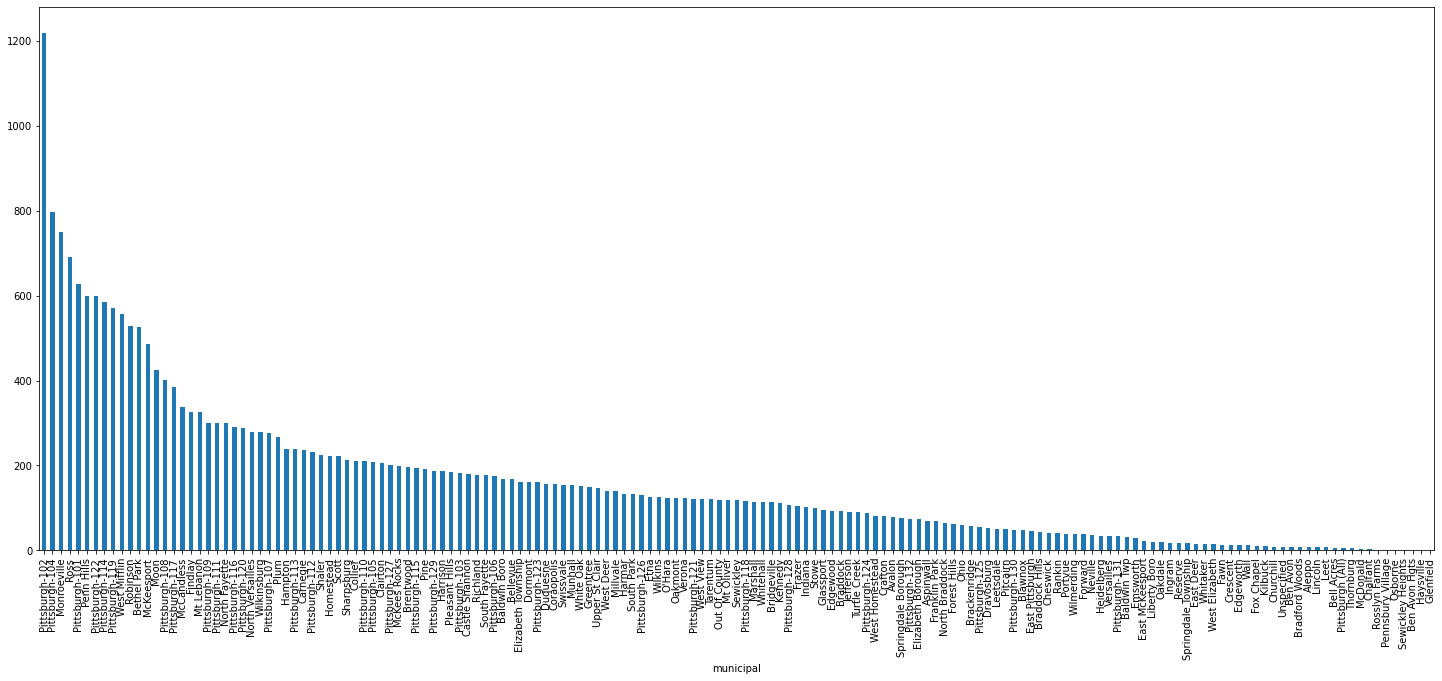

In [4]:
restuarants_number.plot(kind="bar",figsize = (25,10))

* Beacause there are lots of municipal, lets focus on first ten of them:

In [5]:
restuarants_number[:10]

municipal
Pittsburgh-102    1219
Pittsburgh-104     797
Monroeville        750
Ross               691
Pittsburgh-101     628
Penn Hills         600
Pittsburgh-122     599
Pittsburgh-114     585
Pittsburgh-119     571
West Mifflin       557
Name: city, dtype: int64

Text(0, 0.5, 'Number')

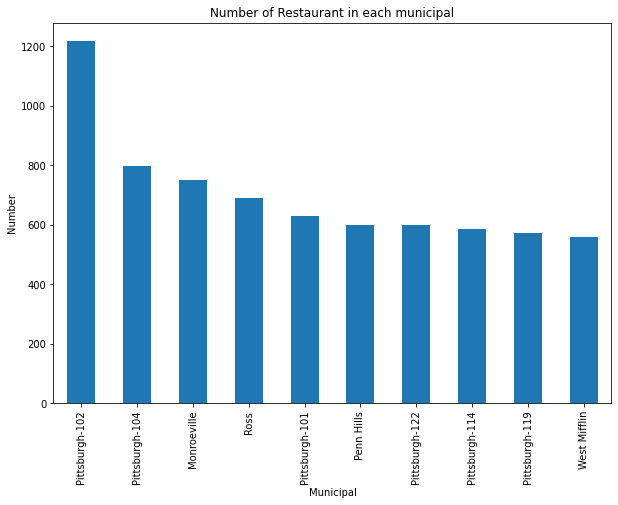

In [29]:
restuarants_number[:10].plot(kind="bar",figsize = (10,7))
plt.title("Number of Restaurant in each municipal")
plt.xlabel("Municipal")
plt.ylabel("Number")

By statistically examining the number of resturants in the each municipal, the top 5 of the best neighborhoods can be classified as follow:
1. Pittsburgh 102
2. Pittsburgh 104
3. Monroeville
4. Ross
5. Pittsburgh 101

---
## Number of seats

* In this part the total number of seats of first ten restaurnts in each municipal will be showen:

In [7]:
restuarants_seats = restaurant.groupby("municipal").sum().loc[:, "seat_count"].sort_values(ascending=False)
restuarants_seats[:10]

municipal
Pittsburgh-102    57597.0
Monroeville       27542.0
Pittsburgh-104    24742.0
Robinson          23759.0
Pittsburgh-101    23126.0
Moon              22198.0
Pittsburgh-119    22043.0
Ross              21890.0
West Mifflin      16513.0
Pittsburgh-122    16321.0
Name: seat_count, dtype: float64

* The graph for this part is:

Text(0, 0.5, 'Number of seats')

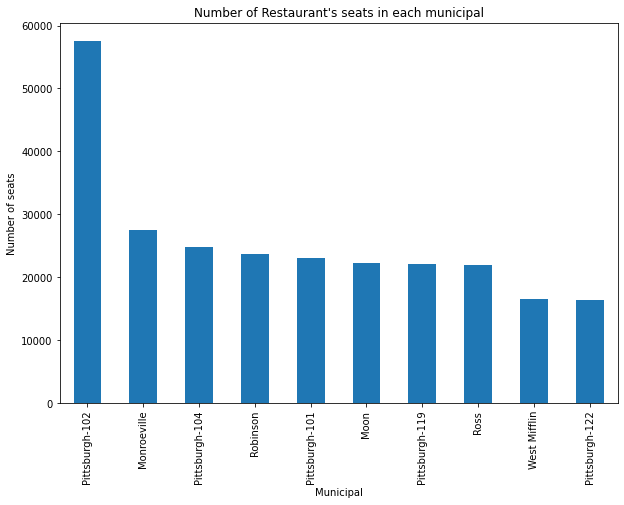

In [30]:
restuarants_seats[:10].plot(kind="bar",figsize = (10,7))
plt.title("Number of Restaurant's seats in each municipal")
plt.xlabel("Municipal")
plt.ylabel("Number of seats")

By statistically examining the number of seats in the each municipal, the top 5 of the best neighborhoods can be classified as follow:
1. Pittsburgh 102
2. Monroeville
3. Pittsburgh 104
4. Robinson
5. Pittsburgh 101

---
## Area of resturants

* In this part the total area of the first ten restaurnts in each municipal will be showen:

In [9]:
restuarants_sqft = restaurant.groupby("municipal").sum().loc[:, "sq_feet"].sort_values(ascending=False)
restuarants_sqft[:10]


municipal
Pittsburgh-123    2809924.0
Pittsburgh-102    1119390.0
Findlay           1096080.0
Pittsburgh-128    1049689.0
West Mifflin       944971.0
Bethel Park        788768.0
Harmar             752419.0
Monroeville        718248.0
Ross               687462.0
Robinson           634532.0
Name: sq_feet, dtype: float64

* The graph for this part is:

Text(0, 0.5, 'Area')

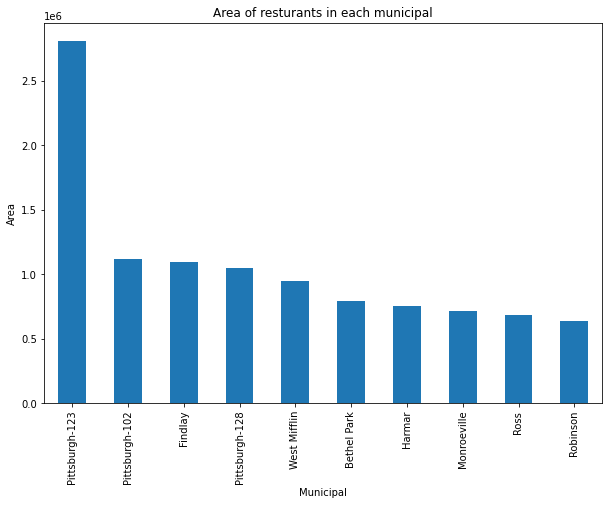

In [31]:
restuarants_sqft[:10].plot(kind="bar",figsize = (10,7))
plt.title("Area of resturants in each municipal")
plt.xlabel("Municipal")
plt.ylabel("Area")

By statistically examining the area of resturants in the each municipal, the top 5 of the best neighborhoods can be classified as follow:
1. Pittsburgh 123
2. Pittsburgh 102
3. Findlay
4. Pittsburgh 128
5. West Mifflin

---
## Conclusion

In conclusion, according to the results of statistical data, I must say Pittsburgh 102 is our the best neighborhood in the feild of restaurant and food servivve. I concluded this because Pittsburgh 102 gets the frist ranking in the number of restaurant and number of seats and second ranking in the area.

![alt text](https://media.giphy.com/media/YMphNUNP0PYHWhtVQS/giphy.gif) 